# Modeling
Author Brian Tam, 10/16/2020

Inserted my final processed train/test Dataframes 
into various models to evaluate

12. Address class imbalance with randomOverSampler
13. Created a pipline to run the following models:
    - Logistic Reg
    - Decision Tree
    - Random Forest
    - BernoulliNB
    - MultinomialNB
    - SVC
    - XGBoost
14. Created 4 seperate models to classify each letter

### Imports

In [114]:
# Get pandas and postgres to work together
import psycopg2 as pg
import pandas as pd
import numpy as np
import pickle

# Import spacy to do NLP
import spacy

# Split the data into training and test sets
from sklearn.model_selection import train_test_split

# Import sklearn to do CountVectorizing
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

import matplotlib.pyplot as plt

import databricks.koalas as ks

# Topic Modeling
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity


# Text Preprocessing
import re
import string

# Pipeline dealing with class imbalance
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import ADASYN

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from tpot import TPOTClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# scoring metrics
from sklearn.metrics import classification_report

In [115]:
X_train_topics=pd.read_csv('data/X_train_topics.csv',index_col=0)
X_test_topics=pd.read_csv('data/X_test_topics.csv',index_col=0)
y_train_all=pd.read_csv('data/y_train_all.csv',index_col=0)
y_test_all=pd.read_csv('data/y_test_all.csv',index_col=0)

In [148]:
X_train_all=pd.read_csv('data/X_train_all.csv',index_col=0)
X_test_all=pd.read_csv('data/X_test_all.csv',index_col=0)
y_train_all=pd.read_csv('data/y_train_all.csv',index_col=0)
y_test_all=pd.read_csv('data/y_test_all.csv',index_col=0)

In [149]:
y_train_all.columns[1:]

Index(['E/I', 'N/S', 'F/T', 'P/J'], dtype='object')

In [150]:
target = 'E/I'

y_train = y_train_all[target]
y_test = y_test_all[target]



When setting up models toon extreme peramiters
data prep
trying out diffdrent models
hyper perameters
retrain train and val on model

mvp of app to work first them come back

In [151]:

# defining and instantiating other models
models = {"Logistic Reg": LogisticRegression(max_iter=5000), 
          "Decision Tree": DecisionTreeClassifier(),
          "Random Forest": RandomForestClassifier(),
          "BernoulliNB": BernoulliNB(),
          "MultinomialNB": MultinomialNB(),
          "SVC": SVC(),
          'XGBoost': XGBClassifier()
         }

In [152]:
def classification_reports_pipeline(X, y, model_name, model, oversampler):
    """ For a given dataset and classification model, fits the model, predicts classes of
    validation set, and returns the classification report showing precision, recall, f1 and 
    support for each class, as well as the average accuracy score. """

    X = np.array(X)
    y = np.array(y)

    # train-val split and oversample
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=.2, random_state=0)
    X_oversampled_train, y_oversampled_train = oversampler.fit_sample(
        X_train, y_train)

    model.fit(X_oversampled_train, np.array(y_oversampled_train).ravel())
    y_pred = model.predict(X_val)

    # print classification reports
    print(model_name, classification_report(y_val, y_pred))

# Removed sentiment and POS included Max_df and min_df  

In [155]:
X_train_all.head()

,neg,neu,pos,ADJ,ADP,ADV,AUX,CCONJ,DET,INTJ,...,"function, mbti, test, cognitive, enneagram, personality, theory, result, description, introvert, read, preference, score, different, example","woman, man, sex, male, female, gender, wife, old, attractive, yes, need, sexual, society, tell, body","music, song, listen, band, lyric, favorite, play, rock, artist, favourite, taste, enjoy, sing, great, write","haha, yeah, hahaha, oh, yes, agree, exactly, kinda, mean, laugh, guess, person, hmm, definitely, man","esfj, estj, esfp, mother, mbti, sister, fe, mom, male, father, inferior, match, tend, agree, girlfriend","day, dream, today, sleep, night, hour, week, dear, wake, morning, walk, wish, eye, little, eat","book, movie, read, watch, character, film, write, favorite, series, finish, story, tv, fiction, anime, language","god, believe, religion, human, argument, exist, science, religious, belief, evidence, universe, claim, mean, atheist, point","relationship, date, boyfriend, year, month, ex, meet, tell, week, romantic, partner, sex, break, long, person","game, play, video, youtube, sport, watch, computer, series, win, buy, remember, anime, team, enjoy, favorite"
7278,0.089,0.747,0.164,118.0,190.0,154.0,106.0,80.0,187.0,5.0,...,0.00531,0.0,0.05446,0.00053,0.00000,0.09128,0.03352,0.00188,0.00000,0.01355
5736,0.083,0.763,0.155,119.0,166.0,145.0,138.0,63.0,170.0,13.0,...,0.02789,0.0,0.00000,0.00020,0.00061,0.00887,0.02649,0.00000,0.03552,0.01378
7512,0.066,0.748,0.186,118.0,128.0,111.0,127.0,49.0,158.0,9.0,...,0.04102,0.0,0.02326,0.00000,0.03757,0.00000,0.04250,0.01192,0.00058,0.00000
8277,0.089,0.744,0.167,108.0,118.0,142.0,123.0,66.0,159.0,12.0,...,0.01660,0.0,0.01978,0.05681,0.00000,0.01779,0.13127,0.00000,0.00000,0.05382
2186,0.123,0.724,0.153,41.0,50.0,43.0,40.0,14.0,52.0,4.0,...,0.00345,0.0,0.00000,0.00000,0.00000,0.02847,0.00000,0.04942,0.00000,0.00000


In [158]:
for mb in y_train_all.columns[1:]:
    # Update target variable
    target = mb
    print('--------------------------------------------' )
    print(mb)
    y_train = y_train_all[target]
    y_test = y_test_all[target]
    
    for model_name, model in models.items():
        classification_reports_pipeline(X_train_all, y_train, model_name, model, RandomOverSampler(random_state=42))
        pd.to_pickle(model, f"pickled_models/{mb.replace('/','')}_{model_name}.pkl")
        print(" ")

--------------------------------------------
E/I
Logistic Reg               precision    recall  f1-score   support

           0       0.91      0.86      0.89       798
           1       0.62      0.73      0.67       243

    accuracy                           0.83      1041
   macro avg       0.77      0.80      0.78      1041
weighted avg       0.85      0.83      0.84      1041

 
Decision Tree               precision    recall  f1-score   support

           0       0.84      0.84      0.84       798
           1       0.48      0.47      0.48       243

    accuracy                           0.76      1041
   macro avg       0.66      0.66      0.66      1041
weighted avg       0.76      0.76      0.76      1041

 
Random Forest               precision    recall  f1-score   support

           0       0.86      0.97      0.91       798
           1       0.82      0.46      0.59       243

    accuracy                           0.85      1041
   macro avg       0.84      0.71 

# APPENDIX

In [ ]:
for mb in y_train_all.columns[1:]:
    # Update target variable
    target = mb
    print('--------------------------------------------' )
    print(mb)
    y_train = y_train_all[target]
    y_test = y_test_all[target]
    
    for model_name, model in models.items():
        classification_reports_pipeline(X_train_topics, y_train, model_name, model, RandomOverSampler(random_state=42))
        pd.to_pickle(model, f"pickled_models/{mb.replace('/','')}_{model_name}.pkl")
        print(" ")

### MBTI words filtered out and senitment/parts-of-speech included

In [64]:
for mb in y_train_all.columns[1:]:
    # Update target variable
    target = mb
    print('--------------------------------------------' )
    print(mb)
    y_train = y_train_all[target]
    y_test = y_test_all[target]
    
    for model_name, model in models.items():
        classification_reports_pipeline(X_train_all, y_train, model_name, model, RandomOverSampler(random_state=42))
        print(" ")

--------------------------------------------
E/I
Logistic Reg               precision    recall  f1-score   support

           0       0.85      0.67      0.75       798
           1       0.36      0.60      0.45       243

    accuracy                           0.65      1041
   macro avg       0.60      0.64      0.60      1041
weighted avg       0.73      0.65      0.68      1041

 
Decision Tree               precision    recall  f1-score   support

           0       0.78      0.80      0.79       798
           1       0.27      0.24      0.25       243

    accuracy                           0.67      1041
   macro avg       0.52      0.52      0.52      1041
weighted avg       0.66      0.67      0.66      1041

 
Random Forest               precision    recall  f1-score   support

           0       0.77      0.98      0.87       798
           1       0.48      0.06      0.10       243

    accuracy                           0.77      1041
   macro avg       0.63      0.52 

ValueError: Negative values in data passed to MultinomialNB (input X)

### With MBTI words and sentiment/parts-of-speech

In [67]:
import pickle
pd.to_pickle(SVC, 'SVC.pkl')

In [77]:
for mb in y_train_all.columns[1:]:
    # Update target variable
    target = mb
    print('--------------------------------------------' )
    print(mb)
    y_train = y_train_all[target]
    y_test = y_test_all[target]
    
    for model_name, model in models.items():
        classification_reports_pipeline(X_train_all, y_train, model_name, model, RandomOverSampler(random_state=42))
        pd.to_pickle(model, f"pickled_models/{mb.replace('/','')}_{model_name}.pkl")
        print(" ")

--------------------------------------------
E/I
Logistic Reg               precision    recall  f1-score   support

           0       0.91      0.85      0.88       798
           1       0.60      0.72      0.65       243

    accuracy                           0.82      1041
   macro avg       0.75      0.78      0.76      1041
weighted avg       0.84      0.82      0.83      1041

 
Decision Tree               precision    recall  f1-score   support

           0       0.85      0.87      0.86       798
           1       0.53      0.50      0.52       243

    accuracy                           0.78      1041
   macro avg       0.69      0.68      0.69      1041
weighted avg       0.78      0.78      0.78      1041

 
Random Forest               precision    recall  f1-score   support

           0       0.85      0.97      0.91       798
           1       0.83      0.43      0.57       243

    accuracy                           0.85      1041
   macro avg       0.84      0.70 

### Original (just topic features and MBTI words included)

In [78]:
for mb in y_train_all.columns[1:]:
    # Update target variable
    target = mb
    print('--------------------------------------------' )
    print(mb)
    y_train = y_train_all[target]
    y_test = y_test_all[target]
    
    for model_name, model in models.items():
        classification_reports_pipeline(X_train_topics, y_train, model_name, model, RandomOverSampler(random_state=42))
        print(" ")

--------------------------------------------
E/I


ValueError: Found input variables with inconsistent numbers of samples: [6505, 5204]

In [26]:
classification_reports_pipeline(X_train_topics, y_train,    print( ), RandomUnderSampler())

SVC               precision    recall  f1-score   support

           0       0.74      0.80      0.77       513
           1       0.86      0.82      0.84       788

    accuracy                           0.81      1301
   macro avg       0.80      0.81      0.80      1301
weighted avg       0.81      0.81      0.81      1301



E/I 10-fold mean score for LogisticRegression():  0.8187522155264091

N/S 10-fold mean score for LogisticRegression():  0.8608812477844735

F/T 10-fold mean score for LogisticRegression():  0.8359711686163299

P/J 10-fold mean score for LogisticRegression():  0.794767340186695

E/I 10-fold mean score for MultinomialNB(alpha=1000):  0.8249065343258891

N/S 10-fold mean score for MultinomialNB(alpha=1000):  0.8513479853479854

F/T 10-fold mean score for MultinomialNB(alpha=1000):  0.8350454921422662

P/J 10-fold mean score for MultinomialNB(alpha=1000):  0.7852385678837293

E/I 10-fold mean score for SVC():  0.8267425262909134

N/S 10-fold mean score for SVC():  0.8418166134940328

F/T 10-fold mean score for SVC():  0.852574500768049

P/J 10-fold mean score for SVC():  0.8087545787545787

E/I 10-fold mean score for RandomForestClassifier():  0.811526645397613

N/S 10-fold mean score for RandomForestClassifier():  0.8256774193548386

F/T 10-fold mean score for RandomForestClassifier():  0

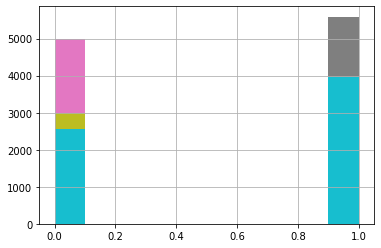

In [18]:
for model in [LogisticRegression(), MultinomialNB(alpha=1000), SVC(), RandomForestClassifier(), GradientBoostingClassifier()]:
    for mb in y_train_all.columns[1:]:
        # Update target variable
        target = mb

        y_train = y_train_all[target]
        y_test = y_test_all[target]
        y_train.hist()

        imba_pipeline = make_pipeline(RandomUnderSampler(), 
                                      model)
        cross_val_scores = cross_val_score(imba_pipeline, X_train_topics, y_train, scoring='accuracy', cv=10)
#         print(cross_val_scores)
        print(f'{mb} 10-fold mean score for {model}: ', np.mean(cross_val_scores))
        print()

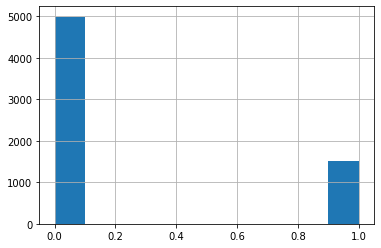

In [130]:
y_train.hist()

### Try classifying using Logistic Regression

In [131]:
# Create a logistic regression model to use
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight = 'balanced')

In [132]:
# Train the first model
lr.fit(X_train_topics, y_train)
y_pred_topics = lr.predict(X_test_topics)

In [133]:
# Create a function to calculate the error metrics, since we'll be doing this several times
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def conf_matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, xticklabels=['predicted_negative', 'predicted_positive'], 
                yticklabels=['actual_negative', 'actual_positive'], annot=True,
                fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");

    true_neg, false_pos = cm[0]
    false_neg, true_pos = cm[1]

    accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
    precision = round((true_pos) / (true_pos + false_pos),3)
    recall = round((true_pos) / (true_pos + false_neg),3)
    f1 = round(2 * (precision * recall) / (precision + recall),3)

    cm_results = [accuracy, precision, recall, f1]
    return cm_results

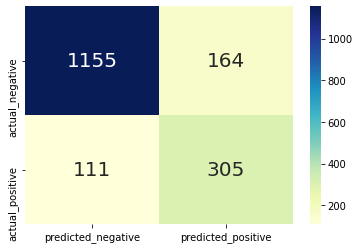

In [135]:
# The heat map for the first logistic regression model
cm1 = conf_matrix(y_test, y_pred_topics)

In [136]:
# Compile all of the error metrics into a dataframe for comparison
results = pd.DataFrame(list(zip(cm1)))
results = results.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results.columns = ['LogReg1']
results

,LogReg1
Accuracy,0.841
Precision,0.650
Recall,0.733
F1 Score,0.689


### Try classifying using Naive Bayes

In [12]:
print(y_train.shape)
X_train_topics.shape

(6505,)


(6505, 40)

In [13]:
# Fit the first Naive Bayes model
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train_topics, y_train)

y_pred_topics_nb = mnb.predict(X_test_topics)

In [14]:
# Fit the second Naive Bayes model
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(X_train_topics, y_train)

y_pred_nb = bnb.predict(X_test_topics)

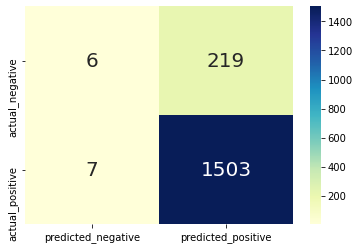

In [15]:
# Here's the heat map for the first Naive Bayes model
cm3 = conf_matrix(y_test, y_pred_nb)

In [138]:
# Compile all of the error metrics into a dataframe for comparison
results_nb = pd.DataFrame(list(zip(cm1, cm3)))
results_nb = results_nb.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results_nb.columns = ['LogReg1', 'NB1']
results_nb

,LogReg1,NB1
Accuracy,0.628,0.870
Precision,0.915,0.873
Recall,0.630,0.995
F1 Score,0.746,0.930


## Use make pipeline

In [141]:
imba_pipeline = make_pipeline(RandomUnderSampler(), 
                              LogisticRegression())
cross_val_scores = cross_val_score(imba_pipeline, X_train_topics, y_train, scoring='accuracy', cv=10)
print(cross_val_scores)
print('10-fold mean score: ', np.mean(cross_val_scores))

[0.80337942 0.8202765  0.82795699 0.85560676 0.80952381 0.82461538
 0.80153846 0.83076923 0.82307692 0.82307692]
10-fold mean score:  0.8219820394659104


In [127]:
imba_pipeline = make_pipeline(RandomOverSampler(), 
                              LogisticRegression())
cross_val_scores = cross_val_score(imba_pipeline, X_train_topics, y_train, scoring='Accuracy', cv=10)
print(cross_val_scores)
print('10-fold mean score: ', np.mean(cross_val_scores))

[0.91992551 0.92051756 0.93554328 0.90651558 0.90702087 0.93148148
 0.92022263 0.92393321 0.92207792 0.92063492]
10-fold mean score:  0.9207872972214922


In [128]:
imba_pipeline = make_pipeline(SMOTE(), 
                              LogisticRegression())
cross_val_scores = cross_val_score(imba_pipeline, X_train_topics, y_train, scoring='f1', cv=10)
print(cross_val_scores)
print('10-fold mean score: ', np.mean(cross_val_scores))

[0.90892019 0.91705499 0.93419833 0.90684411 0.89885496 0.93283582
 0.92149533 0.91775701 0.91806331 0.91304348]
10-fold mean score:  0.9169067524214911


In [100]:
imba_pipeline = make_pipeline(ADASYN(), 
                              LogisticRegression())
cross_val_scores = cross_val_score(imba_pipeline, X_train_topics, y_train, scoring='f1', cv=10)
print(cross_val_scores)
print('10-fold mean score: ', np.mean(cross_val_scores))

[0.66494845 0.66298343 0.69021739 0.71866295 0.65168539 0.66115702
 0.63509749 0.68169014 0.64971751 0.65957447]
10-fold mean score:  0.6675734257115697


In [101]:
from imblearn.over_sampling import RandomOverSampler

In [96]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [ ]:
params = {'sampling tech'  : [SMOT]}

In [102]:

new_params = {'LogisticRegressionClassifier__' + key: params[key] for key in params}
grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf, scoring='recall',
                        return_train_score=True)
grid_imba.fit(X_train, y_train);

NameError: name 'params' is not defined

In [ ]:
[.77, .85],[.86, 90],[.54,.84],[.6,.77]